In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import mglearn

# Loading dataset and then extracting only the 5 attributes we want
data = pd.read_csv("C:\\Modeling Machine Learning\\australian crabs data.csv")
morpho = data[['frontal_lobe_size', 'rear_width', 'carapace_length', 'carapace_width', 'body_depth']]

In [2]:
# Load KMeans and start to cluster morpho
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(morpho)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
# Load Agglomerative Clustering and start cluster of morpho
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(morpho)
print("Cluster memberships:\n{}".format(agg.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
# Load adjusted rand score and evaluate cluster with ground truth
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score

labels_true = ['Color']

clusters1 = kmeans.labels_
clusters2 = agg.labels_
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.12
ARI: 0.56


In [5]:
# The clustering algorithm kmeans had a better outcome on the crabs than the agglomerative clustering algorithm.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(morpho)
X_scaled = scaler.transform(morpho)

# Load PCA and keep the first two components of the data, then fit PCA model to data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transform the data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (200, 5)
Reduced shape: (200, 2)


Text(0, 0.5, 'Second principal componenet')

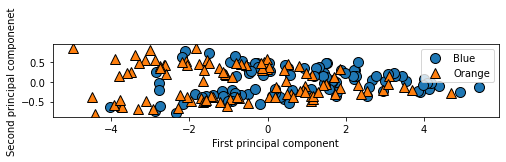

In [7]:
# Plot first vs second principal component, colored by class
blue = data[data.Color == 0]
orange = data[data.Color == 1]


plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], data.Color)
plt.legend(["Blue", "Orange"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal componenet")